# HW2  Regression Fun Time!
## Due Monday February 14th, 2022 at Midnight

Please run the cell below to import libraries needed for this HW. Please use the autograd numpy, otherwise you will have issues. 

In [1]:
# Imports
import autograd.numpy as np
from autograd import grad 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

# Enable inline plotting
%matplotlib inline

Q1) [10 points] Implement the linear regression model discussed in class below. The function (called model) takes in an array of data points, x , and an array of weights, w, and returns a vector y_predicted containing the linear combination for each of the data points. This is the linear model we have discussed in class. You can assume each data point in x only has one feature.  The length of the vector being returned should be the same as x.


In [2]:
def model(w, x):
    """Predicts an outcome as a linenar combination of features and weights
            @param w: a numpy array of weights
            @param x: a numpy array of features
        @returns: the predicted outcome
        """
    return np.dot(x.T, w[1:]) + w[0]

Q2) [10 ponts] Implement the least squares function discussed in class below. The function should take in an array of weights, w, an array of x's and an array of ys. It should use the model function implemented above and return a float indicating the total cost.

In [3]:
def least_squares(w, x, y):    
    """Calculates the MSE of a model
            @param w: a numpy array of weights
            @param x: a numpy array of features
            @param y: the actual value
        @returns: the mean squared error of the model with the given weights and bias"""
    return np.sum((model(w, x) - y)**2) / float(y.size)

Q3) [5 point] This one is a freebie from HW1. Copy and paste your gradient descent function here. Specifically, the one that takes in the cost function as input and return the weight and cost history. We will be using a fixed alpha for this HW. The only difference is that this function should now also take in as input an array of x and ys, corresponding to our data. The w,x, and y are given as inputs to the cost funtion and its gradient.

In [4]:
def gradient_descent(g, alpha, max_its, w, x, y):
    
    """Finds optimal weights by using gradient descent
            @param g: a cost function to optimize
            @param alpha: the learning rate
            @param max_its: the maximum number of iteratiions to run gradient descent
            @param w: a numpy array of starting weights
            @param y: actual values
        @returns numpy arrays of the weight and cost histories"""
    
    # Weights to be updated
    wk = w
    
    # Calculates the gradient for the above function given any w
    gradient = grad(g)
    
    # Will hold the costs and weights after each iteration
    cost_history = [g(w, x, y)]
    weight_history = [wk]
    
    # Claculates weights by moving down the gradient
    for iter in range(max_its):
        wk = wk - alpha*gradient(wk, x, y)
        cost_history.append(g(wk, x, y))
        weight_history.append(wk)
        
    return weight_history, cost_history

Q4) [1 points]  Run the code below to import a dataset. Then, plot a scatter plot of the data (x vs y).

In [5]:
# Import the dataset
csvname = 'kleibers_law_data.csv'
data = np.loadtxt(csvname, delimiter=',')
x = np.log(data[:-1, :])
y = np.log(data[-1:, :])

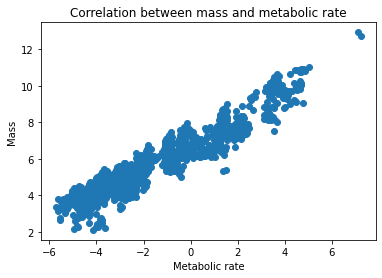

In [6]:
# Make a scatter plot
plt.scatter(x, y)

plt.title("Correlation between mass and metabolic rate")
plt.xlabel("Metabolic rate")
plt.ylabel("Mass")

plt.show()

Q5) [5 points] Use your gradient descent function to learn a linear regression model for the x and y above using the following parameters and plot the cost_history over the 1000 iterations

g = least_squares function you implemented

w = [w_0, w_1]  , where w_0 and w_1 are random numbers between -0.1 and 0.1

max_its=1000

alpha=0.01

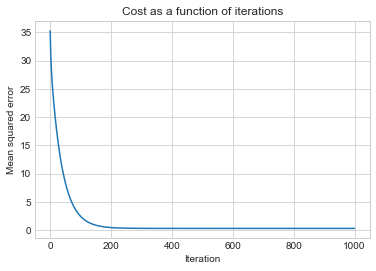

In [7]:
# Learn a line
first_run = gradient_descent(least_squares, 0.01, 1000, np.repeat(np.random.uniform(-0.1, 0.1), 2), x, y)

# Create the basic plot
plt.style.use("seaborn-whitegrid")
plt.plot(first_run[1])

# Make it look better
plt.title("Cost as a function of iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean squared error")

plt.show()

Q6) [5 points] Use the learned weights from above (note that the "learned" weights are the ones with the lowest cost) to plot the learned line. You can use the linspace method (shown below) to generate a list of xs that you can use for plotting. You need to generate a y for each of the candidate xs using the learned weights. On the same figure, also plot the scatter plot from Q4. 


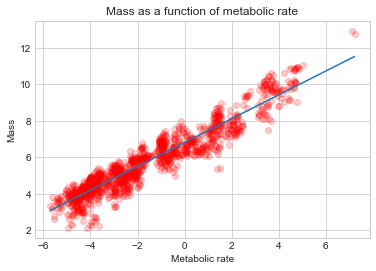

In [8]:
# Xs to use for prediction
s = np.linspace(np.min(x), np.max(x))

# Weights where the cost is minimized
w_pred = first_run[0][-1]

# Predicted y values
pred_y = w_pred[1]*s + w_pred[0]

plt.plot(s, pred_y)
plt.scatter(x, y, color="red", alpha=0.2)
plt.title("Mass as a function of metabolic rate")
plt.xlabel("Metabolic rate")
plt.ylabel("Mass")

plt.show()

Q7) [1 points]  Run the code below to import a dataset. Then, plot a scatter plot of the data (x vs y). 

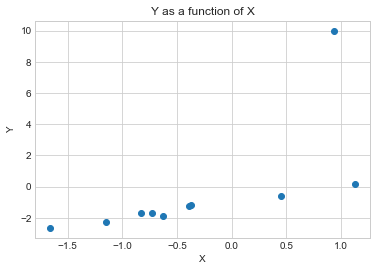

In [9]:
# load in dataset
data = np.loadtxt('regression_outliers.csv', delimiter=',')
x = data[:-1, :]
y = data[-1:, :]

# Make a scatter plot
plt.scatter(x, y)

# Give it some labels
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Y as a function of X")

plt.show()

Q8) [10 ponts] Implement the least absolute deviations function discussed in class. The function should take in an array of weights, w, an array of x's and an array of ys. It should use the model function implemented in Q1  and return a float indicating the total cost.

In [10]:
def least_absolute_deviations(w, x, y):
    """Implements the least absolute deviatiions function
            @param w: a vector of initial weights to use
            @param x: a vector of features
            @param y: a vector of labels to predict
        @returns the cost of the linear combination of weights and features"""
    return np.sum(np.abs(model(w, x) - y)) / float(y.size)

Q9) [5 points] Use the gradient descent function twice to learn two linear models using the new x and y from Q7 using the following parameters and plot the cost_history for both runs on the same plot. Make the plot for the first run blue and the plot for the second run red.

Run 1) 
g = least_squares function

w = [1.0,1.0]

max_its=100

alpha=0.1

Run 2) 
g = least_absoulte_deviations

w = [1.0,1.0]

max_its=100

alpha=0.1


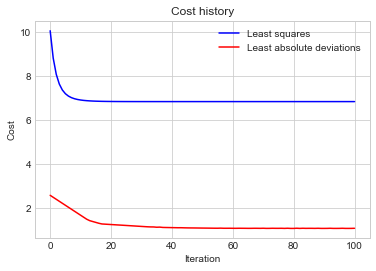

In [11]:
# Learn two lines with different cost functions
second_run = gradient_descent(least_squares, 0.1, 100, np.array([1.0, 1.0]), x, y)
third_run = gradient_descent(least_absolute_deviations, 0.1, 100, np.array([1.0, 1.0]), x, y)

# Instatniate the plot
plot1, ax = plt.subplots()

# Add cost histories
ax.plot(second_run[1], color="blue")
ax.plot(third_run[1], color="red")

# make the plot informative
ax.set_title("Cost history")
ax.legend(["Least squares", "Least absolute deviations"])
ax.xaxis.set_label_text("Iteration")
ax.yaxis.set_label_text("Cost")

plt.show()

Q10) [5 points] Use the learned weights from above to plot the two learned lines (use same colors as above). You can use the linspace method again to generate a list of xs that you can use. On the same figure, also plot the scatter plot from Q7. Which of these lines look like a better fit to you? 

$\color{red}{\text{The plot with the least absolute deviations cost function looks like a better fit, although the outlier might be an important observation.}}$

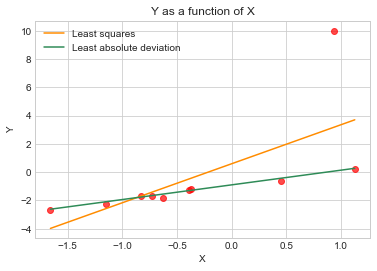

In [12]:
# Make input values to predict labels for
s = np.linspace(np.min(x), np.max(x))

# Get predictions from the second run
w_pred_2 = second_run[0][-1]
pred_y_2 = w_pred_2[1]*s + w_pred_2[0]

# Get predictions from the third run
w_pred_3 = third_run[0][-1]
pred_y_3 = w_pred_3[1]*s + w_pred_3[0]

# Instatniate the plot
plot2, ax = plt.subplots()

# Make a basic plot
ax.scatter(x, y, color="red", alpha=0.7, label="_nolegend_")
ax.plot(s, pred_y_2, color="darkorange")
ax.plot(s, pred_y_3, color="seagreen")

# Add informative text
ax.set_title("Y as a function of X")
ax.legend(["Least squares", "Least absolute deviation"])
ax.xaxis.set_label_text("X")
ax.yaxis.set_label_text("Y")

plt.show()

Q11) [6 points] Implement the mean squared error (MSE) and the mean absolute deviation functions from class. The functions should take in as input an array of actual ys and an array of predicted ys and return the prediction error.

In [13]:
def MSE(y_actual, y_pred):
    return np.sum((y_actual - y_pred)**2) / y_actual.size

def MAD(y_actual, y_pred):
    return np.sum(np.abs(y_actual - y_pred)) / y_actual.size

Q12) [4 points] Use the functions above to report the MSE and MAD for the two models learned in Q9, using the x and y from Q7. You should have 4 values total, two for each model. Which model is doing better? (Note that since you are evaluating the model on the training data, this corresponds to the training error)

$\color{red}{\text{This is a trick question. The first model has a lower MSE, but the second model has a slightly lower MAD. However, comparing the MSE with }}$
$\color{red}{\text{the MAD is misleading since they are different functions.}}$
$\color{red}{\text{Ultimately, which line is a better fit depends on the task at hand.}}$

In [14]:
# Get predictions from the second run
w_pred_2_small = second_run[0][-1]
pred_y_2_small = w_pred_2_small[1]*x + w_pred_2_small[0]

# Get predictions from the third run
w_pred_3_small = third_run[0][-1]
pred_y_3_small = w_pred_3_small[1]*x + w_pred_3_small[0]

# Calculate the errors for both runs
print("The MSE of the first model is " + str(MSE(y, pred_y_2_small)))
print("The MAD of the first model is " + str(MAD(y, pred_y_2_small)))
print("The MSE of the second model is " + str(MSE(y, pred_y_3_small)))
print("The MAD of the first model is " + str(MAD(y, pred_y_3_small)))

The MSE of the first model is 6.841394300667753
The MAD of the first model is 1.68937055338514
The MSE of the second model is 9.866874898545982
The MAD of the first model is 1.09670195220381


Q13) [6 points] Implement the L1 and L2 regularizers from class. Recall the regularizers take in input the weight vector and return a score based on the L1 or L2 norm of the weights

In [15]:
def L2_regularizer(w):
    return np.linalg.norm(w, axis=1)

def L1_regularizer(w):
    return np.linalg.norm(w, axis=1, ord=1)

Q14) [12 points] Turn the least squares function implemented in Q2 into the Ridge (L2) and Lasso (L1) least squares (covered in class) using the functions implemented in Q13. Recall that $\lambda$ is used as a hyperparameter to specify the smoothness of the function learned (higher $\lambda$ leads to simpler and smoother functions whereas lower $\lambda$ leads to better fitting to the data. $\lambda=0$ is the same as non-regularized least-squares)

In [16]:
def ridge(w, x, y, lmbda):  
    return np.sum((model(w, x) - y)**2) / float(y.size) + lmbda*L2_regularizer(w)

def lasso(w,x,y,lmbda):    
    return np.sum((model(w, x) - y)**2) / float(y.size) + lmbda*L1_regularizer(w)

# The rest of the questions are for bonus points, but highly recommended

Q15) [2 points] The file 'weatherHistory.csv'has 96,454 lines, each one corresponding to a data point. Each row (i.e., data point), has several columns. Read the data file. Note that the first line is the header describing each column.

In [17]:
# Read the data
weather_history = pd.read_csv("weatherHistory.csv")

# Numpy, especially Autograd's Numpy, does not like multiplt data types so pandas is a better choice her
weather_history.head()

,Date,Summary,Precip,Temperature,Apparent_Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Loud_Cover,Pressure,Daily_Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Q16) [5 points] Use the data above to set y to be the temperatures and X to be the following columns (in order): [Apparent_Temperature, Humidity, Wind_Speed, Wind_Bearing, Visibility, Pressure] Basically, we want to see whether we can predict the temperature, using the features in X.

In [18]:
# Create the labels
labs = weather_history["Temperature"].to_numpy()

# Convert features to a Numpy array
features = weather_history[["Apparent_Temperature", "Humidity", "Wind_Speed", "Wind_Bearing", "Visibility", "Pressure"]]

We are now going to using a well-known ML library called sklearn. If you do not have it installed, please do so using this instruction: https://scikit-learn.org/stable/install.html

sklearn comes with many models already implemented, below we import the standard linear regression, Ridge, and Lasso models from sklearn. We also import a method that can divide our data into train/test sets. Please run the cell below.

This library is very easy to use. We briefly went over it in the class but please use the API and user guide  ( https://scikit-learn.org) to learn exactly how to use this library.

For instance, learning a linear regression model using sklearn can be done in two lines:

linearModel = LinearRegression() 

linearModel.fit(x_train, y_train)

Q17) [2 points] Use the train_test_split to divide your modified data from Q16 into 80% train, 20% test. 

In [19]:
# Create training and test splits
x_train, x_test, y_train, y_test = train_test_split(features, labs, test_size=0.2, random_state=8675309)

Q18) [10 points] Use sklearn to train a LinearRegression model using the data above. Report the performance of the model on the test data (use sklearn's MSE implementation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html). Note that the .predict method can be used to get the y_predictions for the test xs.

In [20]:
# Train a linear model
m1 = LinearRegression()
m1.fit(x_train, y_train)

# Get predictions
m1_predictions = m1.predict(x_train)

# Report MSE
print("The MSE for this model is " + str(mean_squared_error(y_train, m1_predictions)))

The MSE for this model is 0.8998867957193769


Q19) [10 points] Repeat Q18 but instead of LinearRegression, use the Ridge and Lasso functions. You can keep the default alpha (note that what we called lambda in the class, the hyperparameter for regularization, is called alpha in sklearn. It is the same thing).

In [21]:
# Ridge regression
m2 = Ridge()
m2.fit(x_train, y_train)

# Get predictions
m2_predictions = m2.predict(x_train)

# Report MSE
print("The MSE for the ridge regression is " + str(mean_squared_error(y_train, m2_predictions)))

# Lasso regression
m3 = Lasso()
m3.fit(x_train, y_train)


# Get predictions
m3_predictions = m3.predict(x_train)

# Report MSE
print("The MSE for the LASSO regression is " + str(mean_squared_error(y_train, m3_predictions)))

The MSE for the ridge regression is 0.8998868116862557
The MSE for the LASSO regression is 0.980026238363337


Q20) [4 points] Print the learned parameters for the Ridge and Lasso models (using .coef_).  Note that the parameters below correspond to the feature vector ( [Apparent_Temperature, Humidity, Wind_Speed, Wind_Bearing, Visibility, Pressure]), in order. I.e., the first value corresponds to "Apparent_Temperature", etc. What is the difference between the ridge and lasso parameters? Which features, if any, have been eliminated by lasso?

$\color{red}{\text{The learned parameters are slightly smaller in magnitude in the LASSO regression than in the ridge regression and humidity and visibility }}$
$\color{red}{\text{have been zeroed out by the L1 regularization.}}$

In [22]:
# Examine weights
print(m2.coef_)
print(m3.coef_)

[ 8.72420515e-01 -1.42958858e+00  7.90945789e-02 -4.26522848e-04
  9.10628696e-03 -1.93565304e-04]
[ 8.80345137e-01 -0.00000000e+00  6.82305331e-02 -2.72813846e-04
  0.00000000e+00 -1.49794726e-04]
